# In-Class Simulation: From Stimulation to Force

In this exercise, you'll explore how stimulation and muscle-tendon length affect muscle force,
using a Hill-type muscle model. Your goal is to match a target force trace by adjusting the input conditions.

You'll use a prebuilt Hill model and investigate how activation dynamics, tendon elasticity,
and contractile properties interact.

## 1. Setup
Run this cell to import the simulation function from Josh Cashaback's model.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Create the pre-built muscle model

In [6]:
import numpy as np

def simulate_hill_model(time, stim, L_MT):
    """
    Simulates a Hill-type muscle model with fixed parameters.

    Parameters:
        time (np.ndarray): Time vector (seconds)
        stim (np.ndarray): Neural excitation signal (0 to 1)
        L_MT (np.ndarray): Muscle-tendon unit length (normalized)

    Returns:
        dict: containing activation, contractile force, tendon force, total force
    """
    dt = time[1] - time[0]
    n = len(time)

    # Parameters
    tau_act = 0.01     # Activation time constant (s)
    tau_deact = 0.04   # Deactivation time constant (s)
    L_CE_opt = 1.0     # Optimal fiber length
    L_SE_slack = 0.2   # Tendon slack length
    k_tendon = 20      # Tendon stiffness
    F_max = 1.0        # Max isometric force

    # Initialization
    a = np.zeros(n)
    F_tendon = np.zeros(n)
    F_CE = np.zeros(n)
    L_CE = np.ones(n) * L_CE_opt
    L_SE = np.zeros(n)

    for i in range(1, n):
        # Activation dynamics
        tau = tau_act if stim[i] > a[i-1] else tau_deact
        a[i] = a[i-1] + dt * (stim[i] - a[i-1]) / tau

        # Tendon length from MTU
        L_SE[i] = L_MT[i] - L_CE[i-1]

        # Tendon force (nonlinear exponential)
        if L_SE[i] > L_SE_slack:
            F_tendon[i] = k_tendon * (L_SE[i] - L_SE_slack)**2
        else:
            F_tendon[i] = 0.0

        # Contractile force (equal to tendon force)
        F_CE[i] = F_tendon[i]

        # Force-length relationship (Gaussian)
        fl = np.exp(-((L_CE[i-1] - L_CE_opt) / 0.45)**2)

        # Force-velocity ignored for simplicity
        F_iso = a[i] * fl * F_max

        # Update fiber length (simple 1st-order solve)
        if F_iso > 1e-6:
            L_CE[i] = L_CE[i-1] + dt * (F_CE[i] - F_iso) * 0.5
        else:
            L_CE[i] = L_CE[i-1]

    return {
        'time': time,
        'activation': a,
        'F_tendon': F_tendon,
        'F_CE': F_CE,
        'L_CE': L_CE,
        'F_total': F_tendon
    }


## 2. Define a Target Force Profile
This is the target force profile you should try to match using stimulation and length inputs.

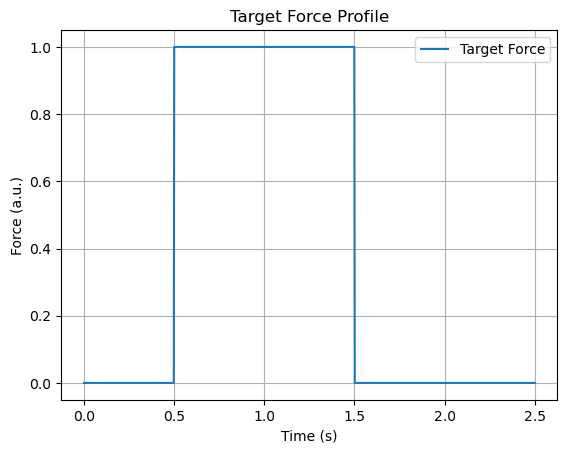

In [21]:
# Target force: plateau profile
time = np.linspace(0, 2.5, 1000)
target_force = np.zeros_like(time)
target_force[(time > 0.50) & (time < 1.50)] = 1.0  # Simulate a plateau from 0.4s to 1.4s

plt.plot(time, target_force, label="Target Force")
plt.title("Target Force Profile")
plt.xlabel("Time (s)")
plt.ylabel("Force (a.u.)")
plt.legend()
plt.grid(True)
plt.show()

## 3. Try Your Own Inputs
### Task 1: Tune simulation
Adjust the stimulation and muscle-tendon length to try to match the target force profile.

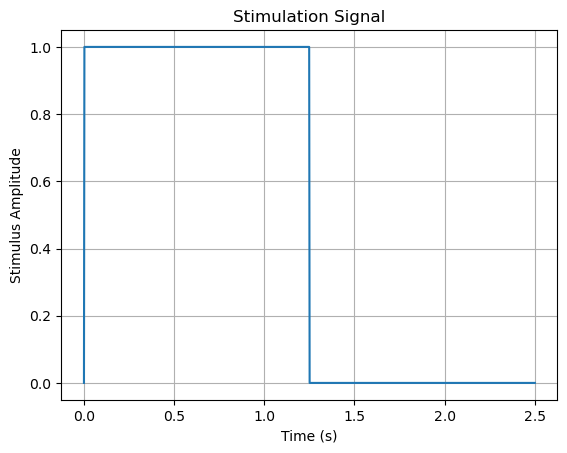

In [22]:
# Example input: stimulation and MTU length
stim = np.zeros_like(time)
stim[(time > 0.00) & (time < 1.25)] = 1.0 # Try modifying this

plt.plot(time, stim)
plt.title("Stimulation Signal")
plt.xlabel("Time (s)")
plt.ylabel("Stimulus Amplitude")
plt.grid(True)
plt.show()

### Task 2: try different muscle-tendon lengths

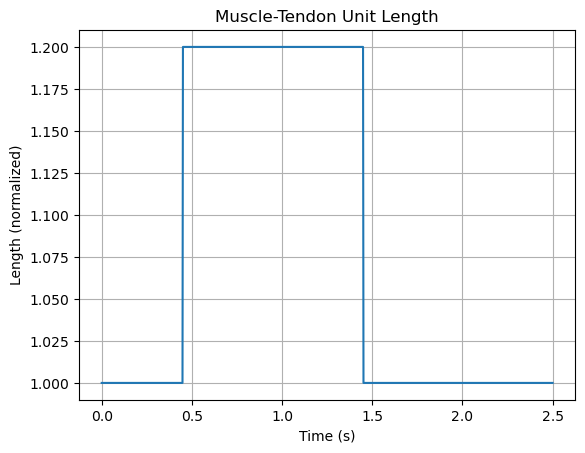

In [ ]:
L_MT = np.ones_like(time) * 1.00  # Try changing this to 0.95 or 1.05
L_MT[(time > 0.5) & (time < 1.45)] = 1.1

plt.plot(time, L_MT)
plt.title("Muscle-Tendon Unit Length")
plt.xlabel("Time (s)")
plt.ylabel("Length (normalized)")
plt.grid(True)
plt.show()

### Task 3: Run the simulation with your chosen inputs

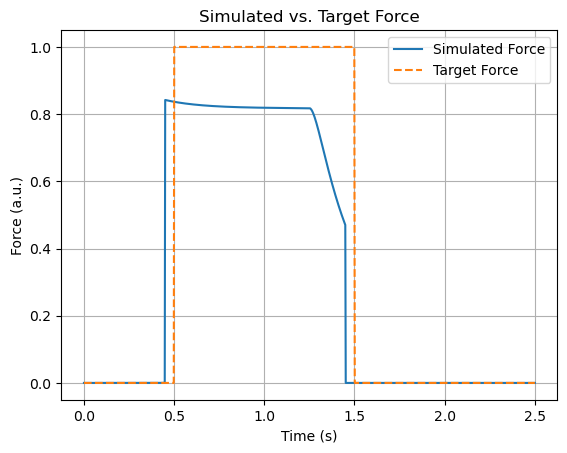

In [33]:
results = simulate_hill_model(time, stim, L_MT)

plt.plot(time, results['F_total'], label="Simulated Force")
plt.plot(time, target_force, '--', label="Target Force")
plt.title("Simulated vs. Target Force")
plt.xlabel("Time (s)")
plt.ylabel("Force (a.u.)")
plt.legend()
plt.grid(True)
plt.show()

### Task 4: Reflect

#### Please edit this markdown to answer the following questions
- What changes to the stimulation pattern affected the shape or timing of the force?
- How did the muscle-tendon length influence the total force?
- Could you get the force to match the target?
